# Homework 1
## Soroush Khadem

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import math

### Problem 4: Firing rate of the LIF model

In [2]:
# define the constants used
taum = 10   # membrane time constant (ms)
urest = 0   # resting potential (mV)
R = 1       # resistance (ohms)
uth = 1     # spiking threshold (mV)

In [3]:
def calcSpikeTime(current):
    return -taum*math.log(1 - ((uth - urest)/(R*current)) ,math.e)

In [4]:
# using solution to calculate Icrit:
Icrit = (uth - urest) / R
step = 0.01
currents = np.arange(Icrit + step, 10, step)
input_times = []

for current in currents:
    input_times.append(calcSpikeTime(current))
input_times = np.array(input_times)



<IPython.core.display.Javascript object>


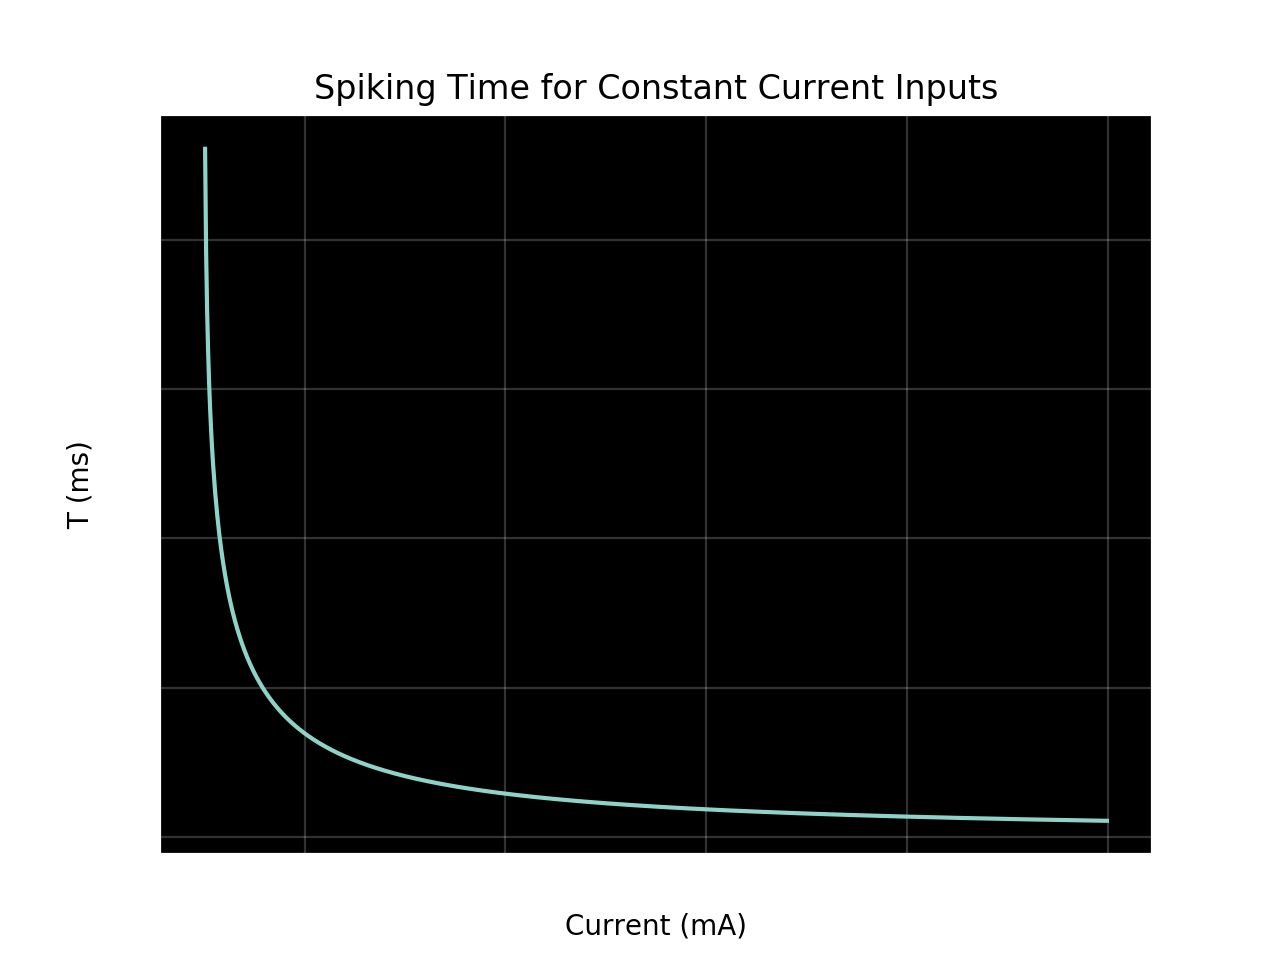

In [5]:
fig = plt.figure()       
plt.grid(True, alpha=0.2)
plt.plot(currents, input_times)
plt.title('Spiking Time for Constant Current Inputs', color='black')
plt.xlabel('Current (mA)', color='black')
plt.ylabel('T (ms)', color='black')
plt.show()

<IPython.core.display.Javascript object>


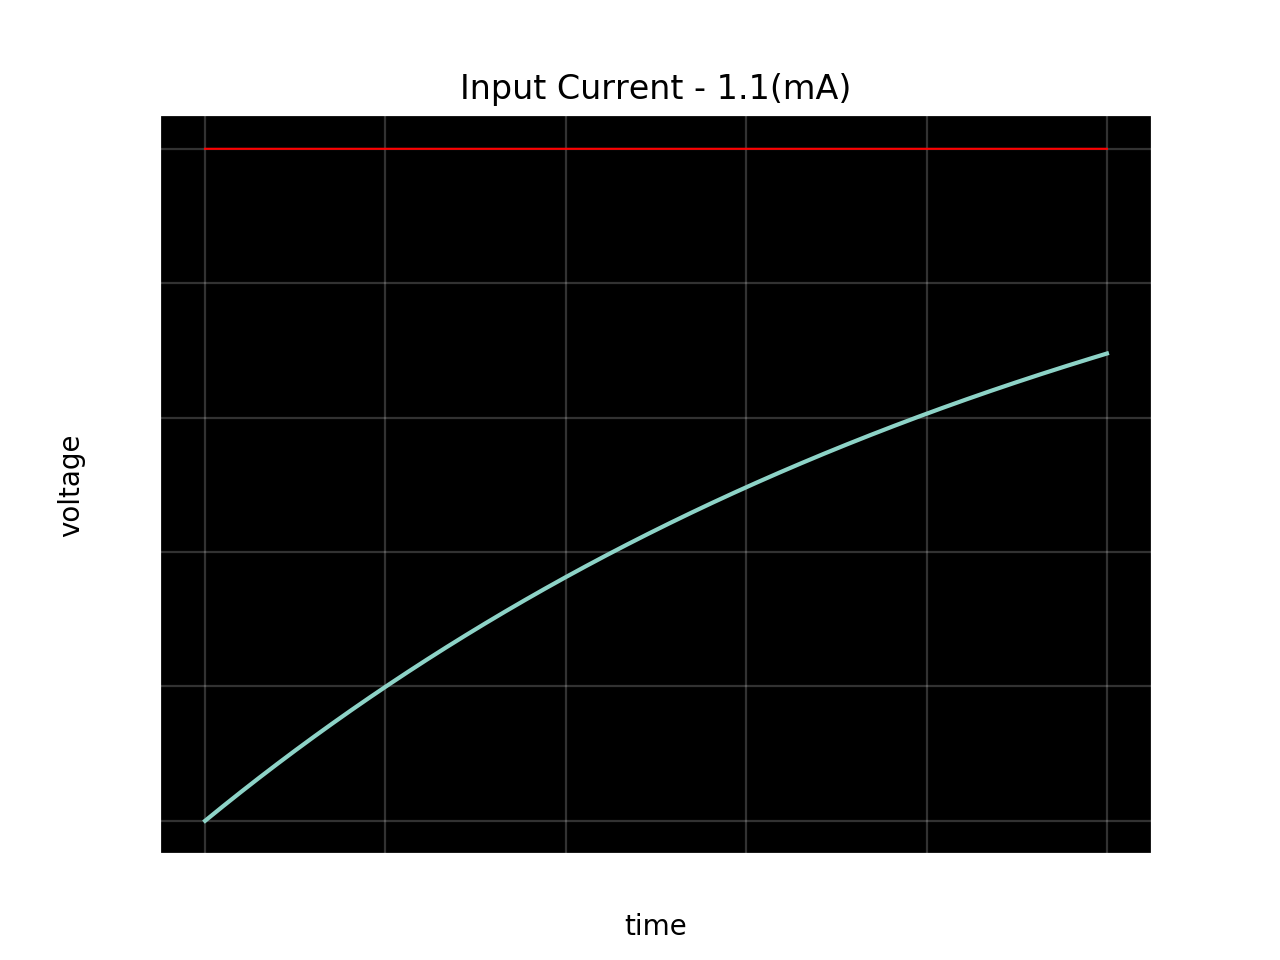

<IPython.core.display.Javascript object>


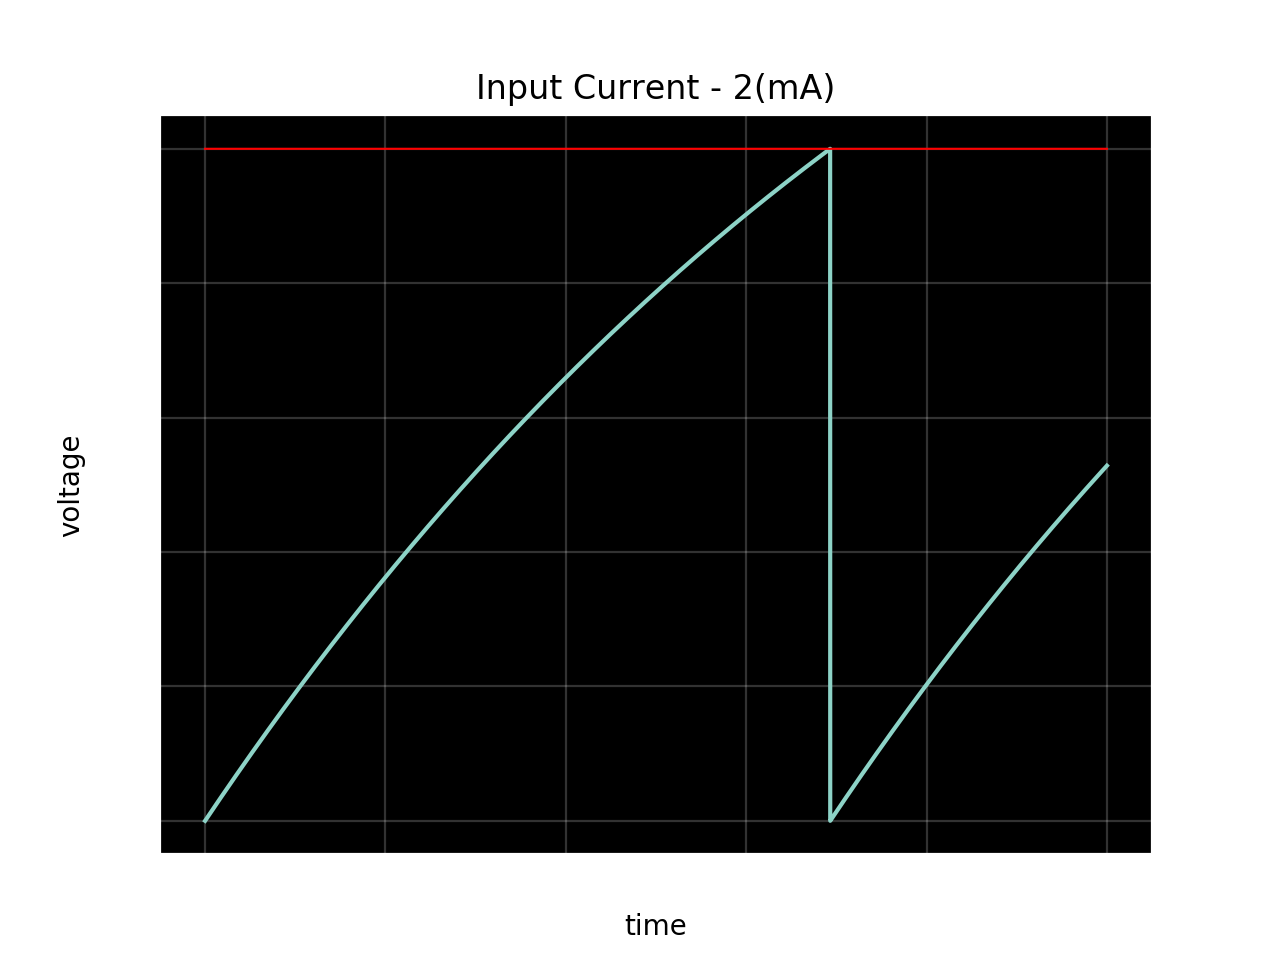

<IPython.core.display.Javascript object>


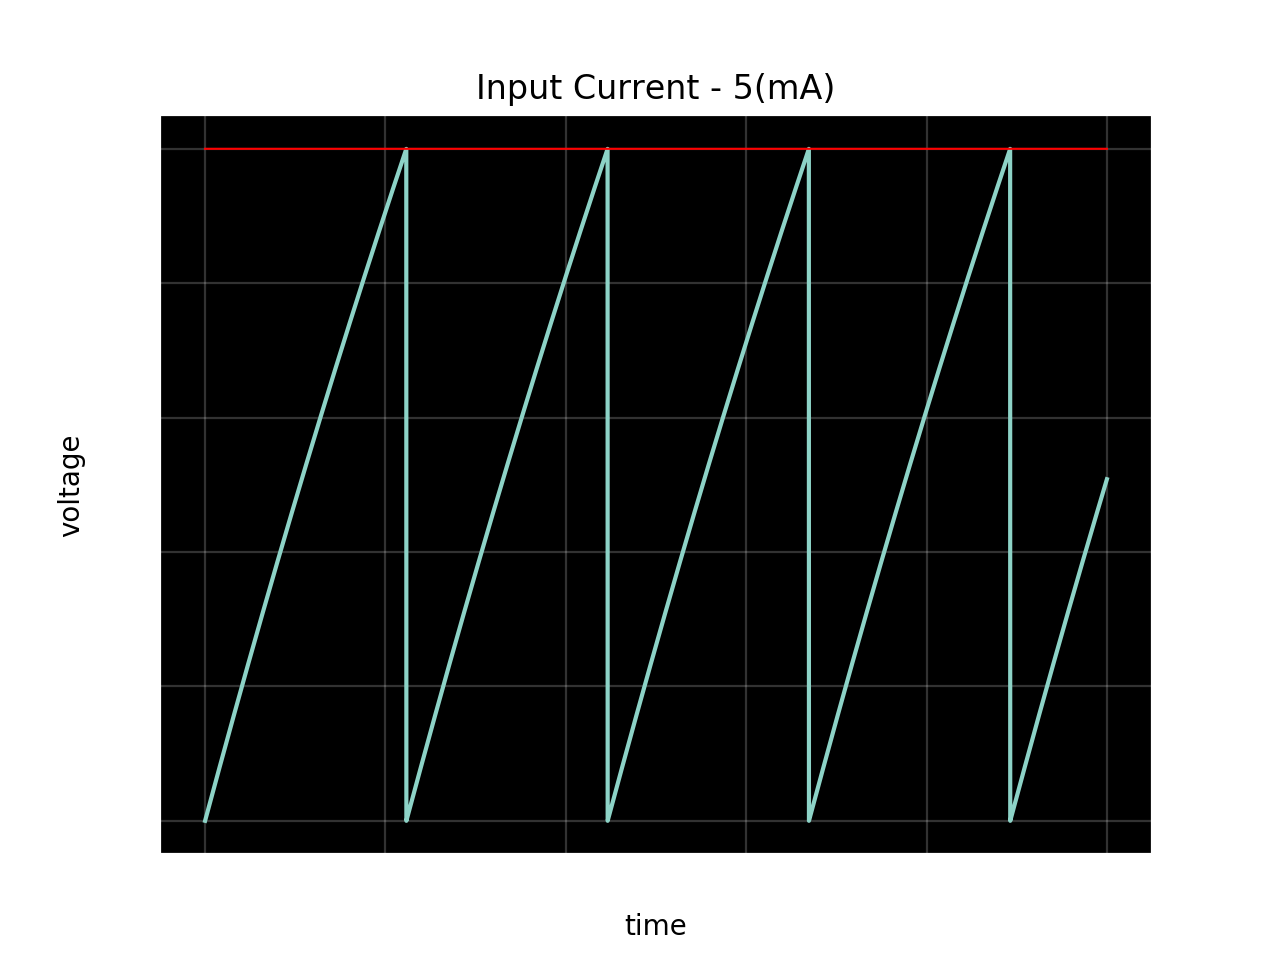

<IPython.core.display.Javascript object>


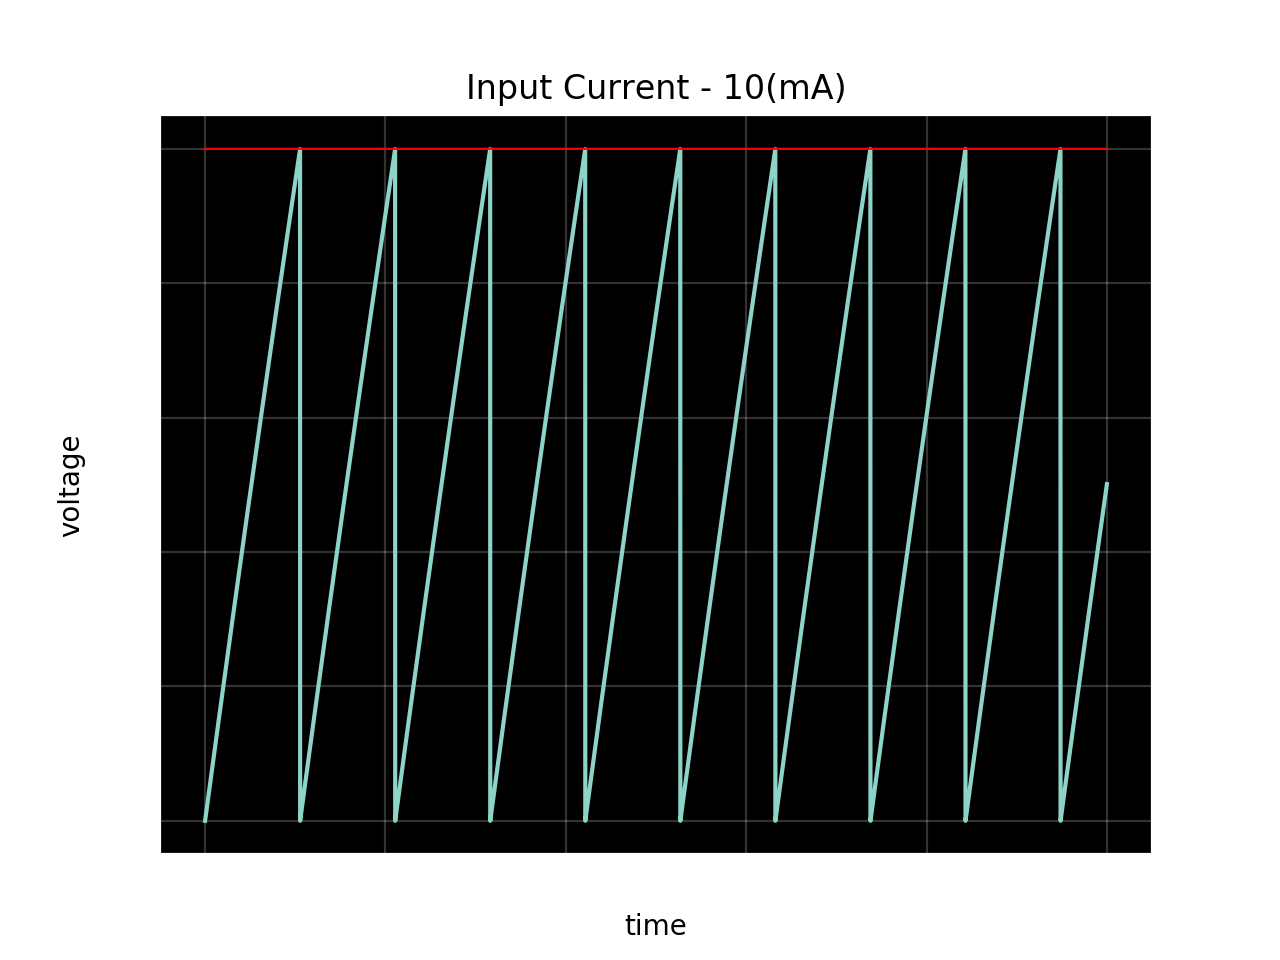

In [6]:
# adapted from lif_mod.py
Is = [1.1, 2, 5, 10]
T = 10      # total time to run
dt = 0.001   # time step
nt = int(np.round(T/dt)+1)     # number of entries in vector array (mV)
tvec = np.linspace(0,T,nt)     # time vector (ms)

u = np.zeros(nt)   # vector of voltage entries
spike_times = []             # initialize vector of spike times

for I in Is:
    spike_times_local = []
    for j in np.arange(nt-1):
        u[j+1] = u[j]+dt*(R*I-u[j])/taum
        if u[j+1]>uth:
            u[j+1]=urest;                   # reset the voltage to resting potential
            spike_times_local.append(tvec[j+1])    # add on another spike time

    spike_times.append(spike_times_local)

    plt.figure()
    plt.grid(True, alpha=0.2)
    plt.plot(tvec,u)
    plt.plot(tvec, [uth]*len(tvec), 'r', linewidth=0.75) # horizontal line for uth
    plt.xlabel('time', color='black')
    plt.ylabel('voltage', color='black')
    plt.title('Input Current - %s(mA)'%I, color='black')
    plt.show()

In [7]:
time_pts = []
for times in spike_times:
    if len(times) > 1:
        time_pts.append(np.mean(np.diff(times)))
    elif len(times) == 1:
        time_pts.append(times[0])
    else:
        time_pts.append(None)


<IPython.core.display.Javascript object>


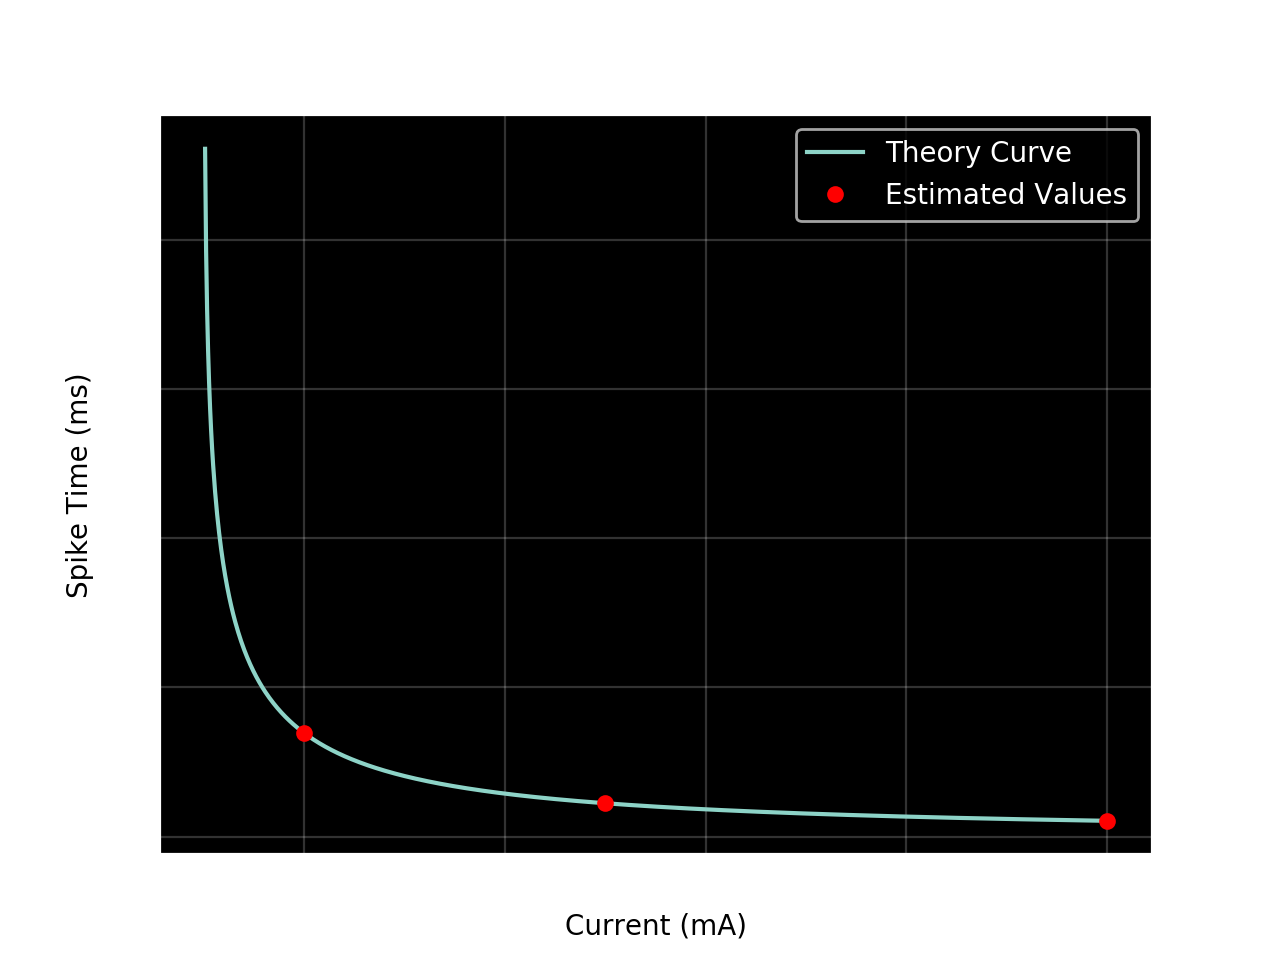

In [8]:
plt.figure()
plt.grid(True, alpha=0.2)
plt.plot(currents, input_times)
plt.plot(Is, time_pts, 'r.', markersize=10)
plt.xlabel('Current (mA)', color='black')
plt.ylabel('Spike Time (ms)', color='black')
plt.legend(['Theory Curve', 'Estimated Values'])

<IPython.core.display.Javascript object>


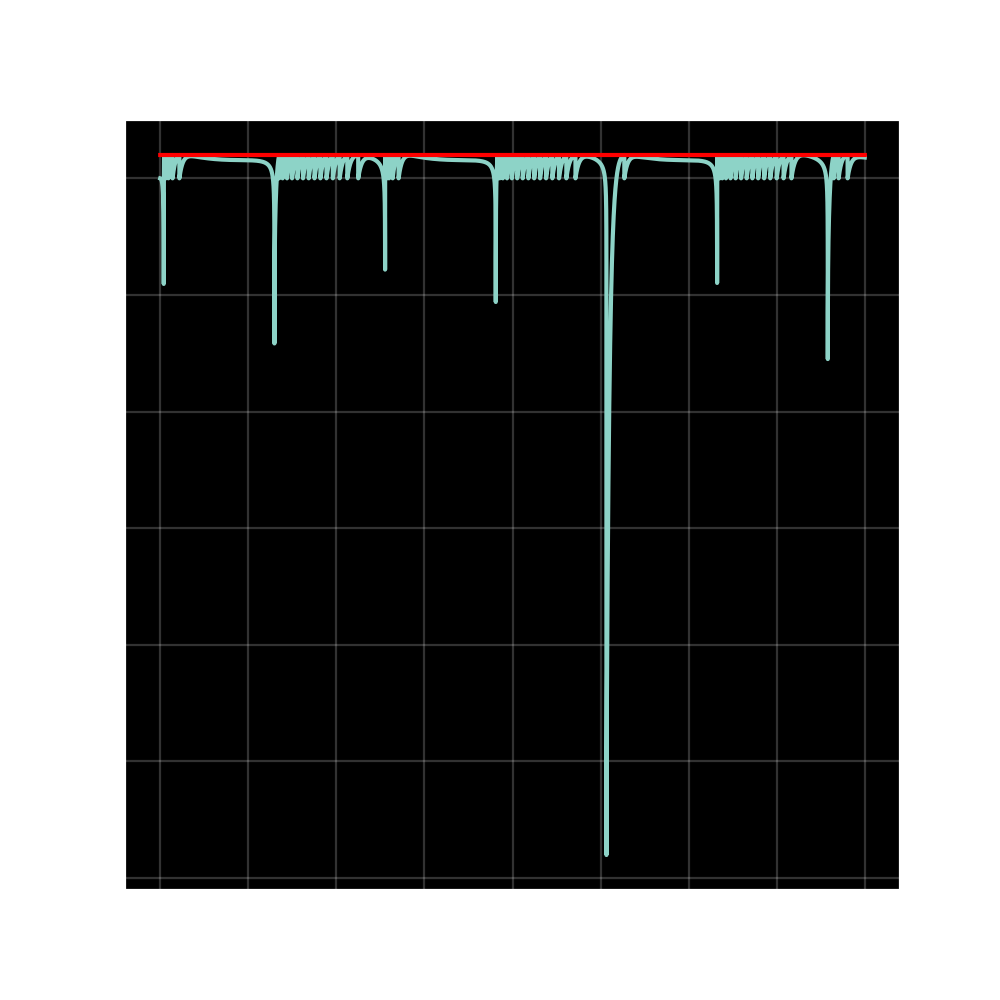

<IPython.core.display.Javascript object>


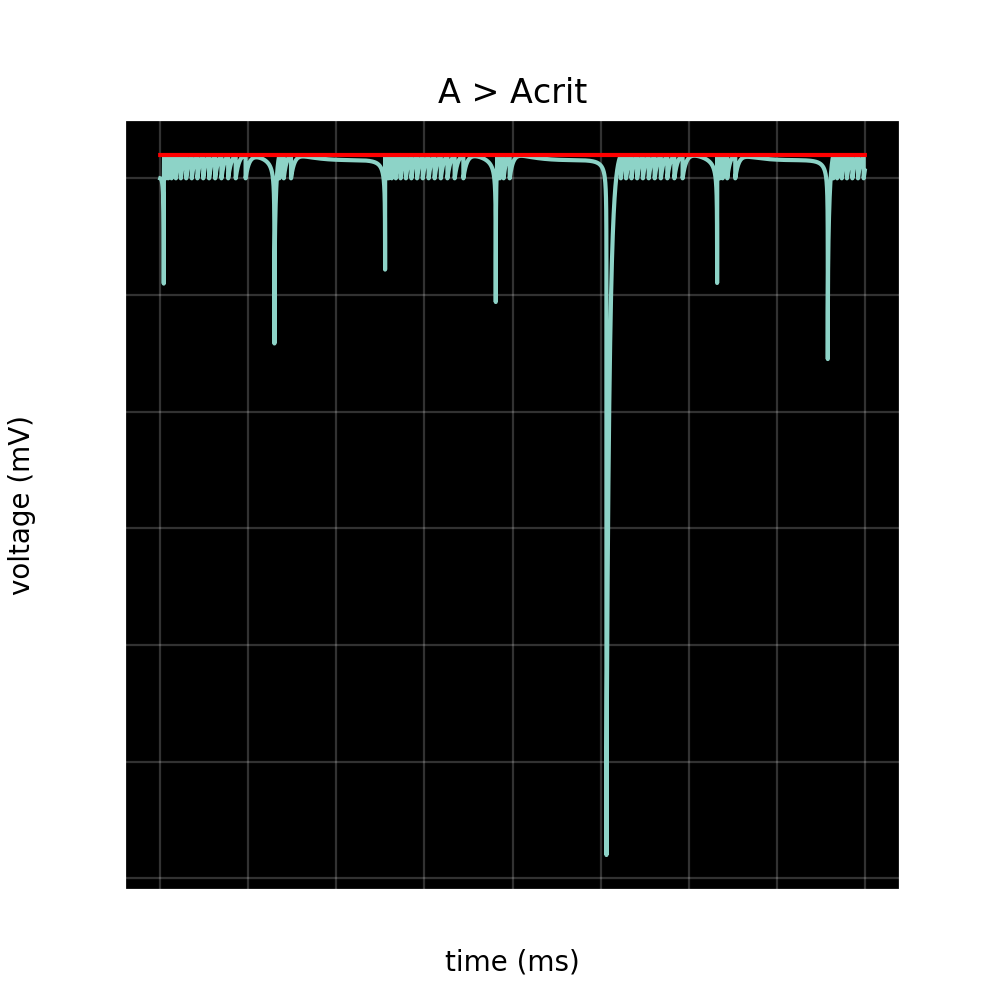

In [9]:
# adapted from lif_per.py
taum = 0.1  # membrane time constant (ms)
urest = 0   # resting potential (mV)
R = 1       # resistance (ohms)
uth = 1     # spiking threshold (mV)
A = 1.5     # current modulation amplitude (mA)

T = 20      # total time to run
dt = 0.001   # time step
nt = int(np.round(T/dt)+1)     # number of entries in vector array
tvec_less = np.linspace(0,T,nt)
tvec_greater = np.linspace(0,T,nt)

u_less = np.zeros(nt);   # vector of voltage entries (A < Acrit)
u_greater = np.zeros(nt);   # vector of voltage entries (A > Acrit)
st_less = 0              # initialize vector to store spike times
st_greater = 0              # initialize vector to store spike times

def A_crit(t):
    return uth*(1+taum**2)/(np.sin(t)-taum*np.cos(t))

for j in np.arange(nt-1):
    A_less = A_crit(tvec_less[j]) - 0.2
    
    I_less = A_less*np.sin(tvec_less[j])
    u_less[j+1] = u_less[j]+dt*(R*I_less-u_less[j])/taum    # update the voltage
    if u_less[j+1]>=uth:
        u_less[j+1]=urest                    # reset the spike voltage
        st_less = np.append(st_less,tvec_less[j+1])    # add spike time to vector
    
    A_greater = A_crit(tvec_greater[j]) + 0.2
        
    I_greater = A_greater*np.sin(tvec_greater[j])
    u_greater[j+1] = u_greater[j]+dt*(R*I_greater-u_greater[j])/taum    # update the voltage
    if u_greater[j+1]>=uth:
        u_greater[j+1]=urest                    # reset the spike voltage
        st_greater = np.append(st_greater,tvec_greater[j+1])    # add spike time to vector
 

plt.figure(figsize=(5,5))
plt.grid(True, alpha=0.2)
plt.plot(tvec_less,u_less)
plt.plot(tvec_less, [uth]*len(tvec_less), 'r')
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.title('A < Acrit')
plt.show()

plt.figure(figsize=(5,5))
plt.grid(True, alpha=0.2)
plt.plot(tvec_greater,u_greater)
plt.plot(tvec_greater, [uth]*len(tvec_greater), 'r')
plt.xlabel('time (ms)', color='black')
plt.ylabel('voltage (mV)', color='black')
plt.title('A > Acrit', color='black')
plt.show()

### Problem 5: Simulating Hodkin-Huxley Model

In [10]:
# adapted from hh_spike.py

from scipy.integrate import odeint

T = 100.0    # end time (in milliseconds)
gK = 36.0   # average potassium channel conductance per unit area (mS/cm^2)
gNa = 120.0 # average sodium channel conductance per unit area (mS/cm^2)
gL = 0.3    # average leak channel conductance per unit area (mS/cm^2)
Cm = 1.0    # membrane capacitance per unit area (uF/cm^2)
EK = -12.0  # potassium potential (mV)
ENa = 115.0 # Sodium potential (mV)
EL = 10.6   # leak potential (mV)
Id = 6      # input current (mA)

# potassium ion-channel rate functions
def alpha_n(Vm):
    return (0.1-0.01*Vm)/(np.exp(1-0.1*Vm)-1)

def beta_n(Vm):
    return 0.125*np.exp(-Vm/80)

# sodium ion-channel rate functions
def alpha_m(Vm):
    return (2.5-0.1*Vm)/(np.exp(2.5-0.1*Vm)-1)

def beta_m(Vm):
    return 4*np.exp(-Vm/18)

def alpha_h(Vm):
    return 0.07*np.exp(-Vm/20)

def beta_h(Vm):
    return 1/(np.exp(3-0.1*Vm)+1)
  
# n, m, and h steady-state values
def n_inf(Vm=0.0):
    return alpha_n(Vm) / (alpha_n(Vm) + beta_n(Vm))

def m_inf(Vm=0.0):
    return alpha_m(Vm) / (alpha_m(Vm) + beta_m(Vm))

def h_inf(Vm=0.0):
    return alpha_h(Vm) / (alpha_h(Vm) + beta_h(Vm))
  
# compute derivatives
def compute_derivatives(y, t0):
    dy = np.zeros((4,))
    
    Vm = y[0]
    n = y[1]
    m = y[2]
    h = y[3]
    
    # dVm/dt
    GK = (gK/Cm)*np.power(n,4.0)
    GNa = (gNa/Cm)*np.power(m,3.0)*h
    GL = gL/Cm
    
    dy[0] = (Id/Cm)-(GK*(Vm-EK))-(GNa*(Vm-ENa))-(GL*(Vm-EL))
    
    # dn/dt
    dy[1] = (alpha_n(Vm)*(1-n))-(beta_n(Vm)*n)
    
    # dm/dt
    dy[2] = (alpha_m(Vm)*(1-m))-(beta_m(Vm)*m)
    
    # dh/dt
    dy[3] = (alpha_h(Vm)*(1-h))-(beta_h(Vm)*h)
    
    return dy
 

<IPython.core.display.Javascript object>


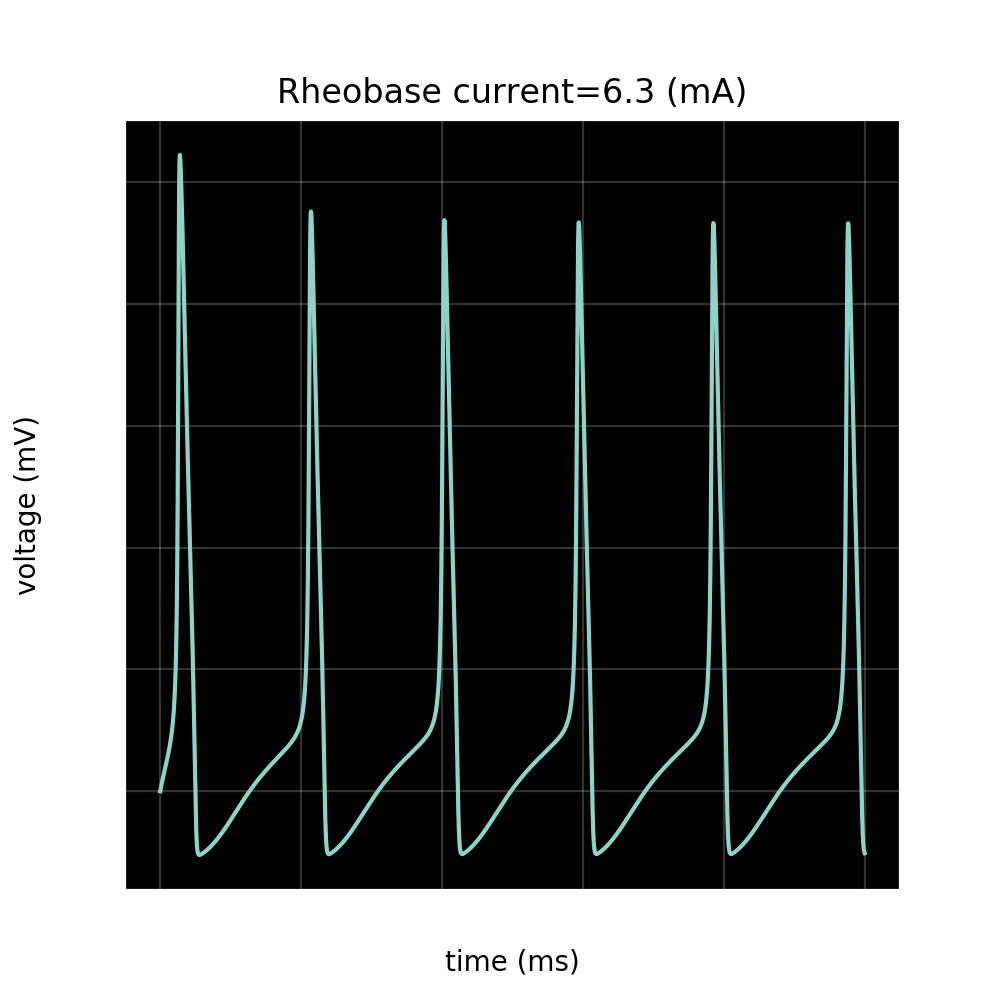

In [11]:
Id = 6.3 # trial and error to find minimal current for repetitive spiking
# time vector
tvec = np.linspace(0, T, 10000)

# state (Vm, n, m, h)
Y = np.array([0.0, n_inf(), m_inf(), h_inf()])

# solve ODE system
# vy = (Vm[t0:tmax], n[t0:tmax], m[t0:tmax], h[t0:tmax])
Vy = odeint(compute_derivatives, Y, tvec)

# plot neuron potential
plt.figure(figsize=(5,5))
plt.grid(True, alpha=0.2)
plt.plot(tvec, Vy[:, 0])
plt.xlabel('time (ms)', color='black')
plt.ylabel('voltage (mV)', color='black')
plt.title('Rheobase current=%s (mA)'%Id, color='black')
plt.show()

#### Part B: Decreasing gK

<IPython.core.display.Javascript object>


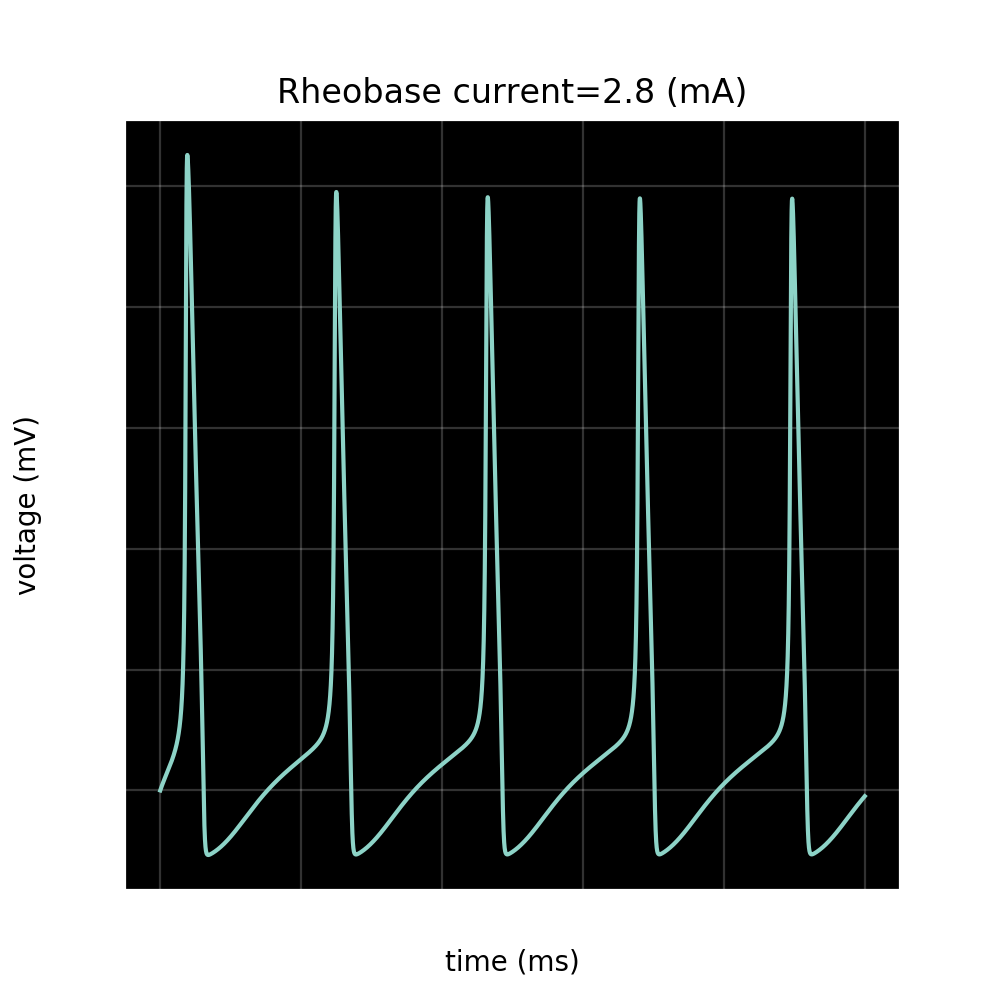

In [12]:
gK = 30 # decrease gK
Id = 2.8 # trial and error to find minimal current for repetitive spiking
# time vector
tvec = np.linspace(0, T, 10000)

# state (Vm, n, m, h)
Y = np.array([0.0, n_inf(), m_inf(), h_inf()])

# solve ODE system
# vy = (Vm[t0:tmax], n[t0:tmax], m[t0:tmax], h[t0:tmax])
Vy = odeint(compute_derivatives, Y, tvec)

# plot neuron potential
plt.figure(figsize=(5,5))
plt.grid(True, alpha=0.2)
plt.plot(tvec, Vy[:, 0])
plt.xlabel('time (ms)', color='black')
plt.ylabel('voltage (mV)', color='black')
plt.title('Rheobase current=%s (mA)'%Id, color='black')
plt.show()

The rheobase current went down because potassium is hyperpolarizing, so reducing the amount of impact of potassium allows the spikes to happen more easily.

#### Part C: Decreasing gNa

<IPython.core.display.Javascript object>


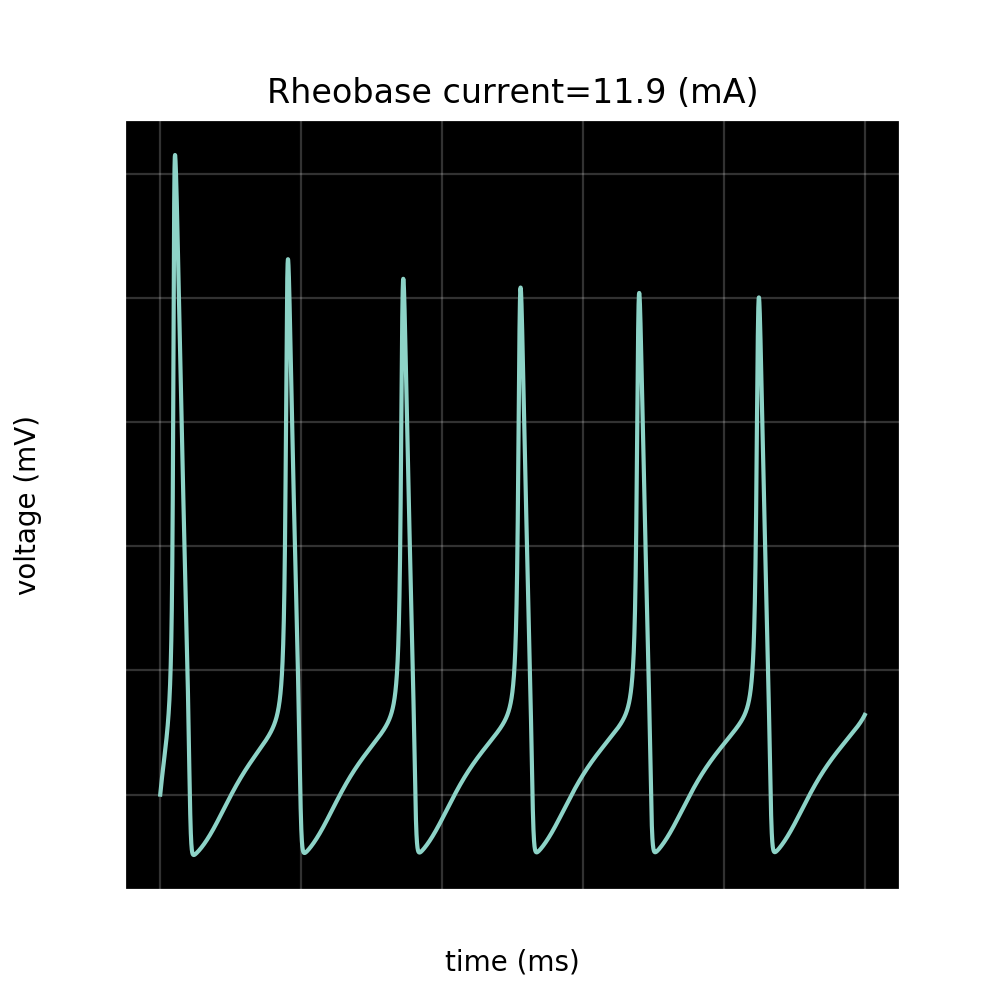

In [13]:
gK = 36 # reset gK
gNa = 100 # decrease gNa
Id = 11.9 # trial and error to find minimal current for repetitive spiking
# time vector
tvec = np.linspace(0, T, 10000)

# state (Vm, n, m, h)
Y = np.array([0.0, n_inf(), m_inf(), h_inf()])

# solve ODE system
# vy = (Vm[t0:tmax], n[t0:tmax], m[t0:tmax], h[t0:tmax])
Vy = odeint(compute_derivatives, Y, tvec)

# plot neuron potential
plt.figure(figsize=(5,5))
plt.grid(True, alpha=0.2)
plt.plot(tvec, Vy[:, 0])
plt.xlabel('time (ms)', color='black')
plt.ylabel('voltage (mV)', color='black')
plt.title('Rheobase current=%s (mA)'%Id, color='black')
plt.show()

Sodium ions are depolarizing, so as expected, the opposite is true and more current is needed to cause repetitive spiking.

#### Part D: Decreasing Ek

<IPython.core.display.Javascript object>


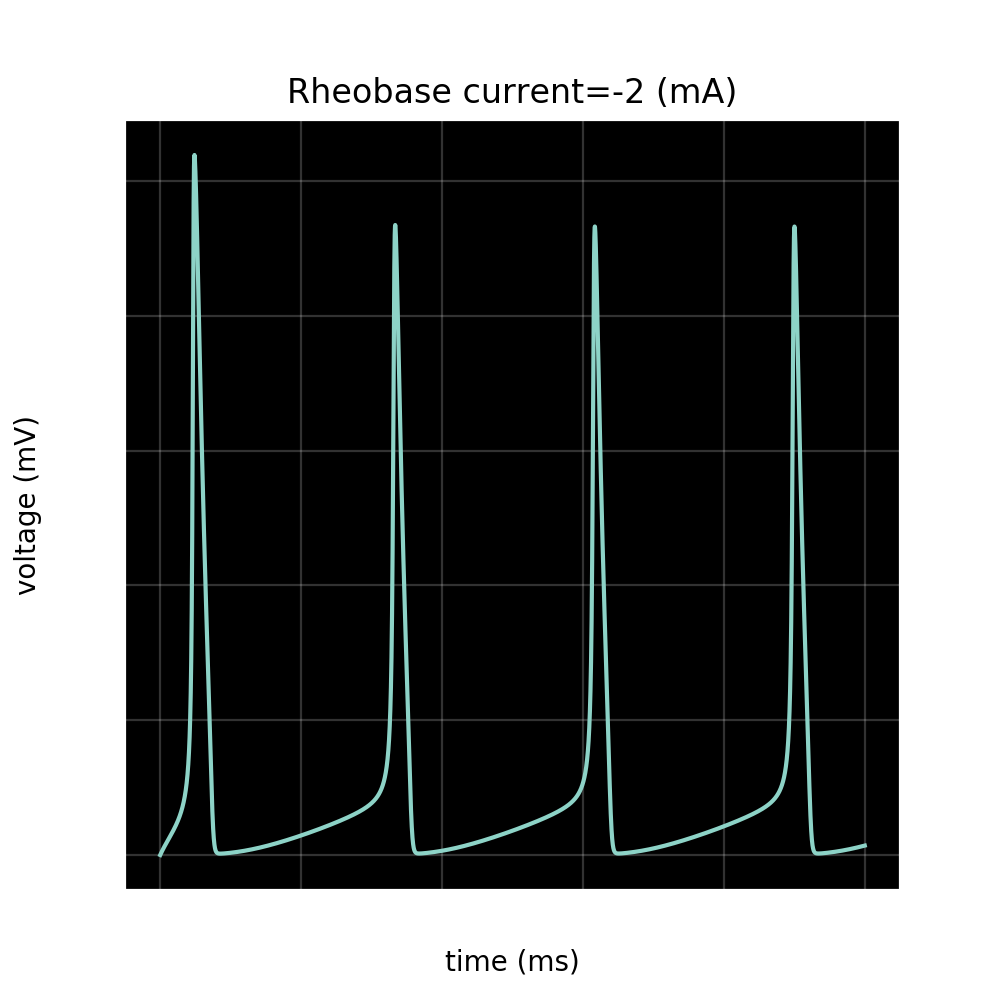

In [14]:
gK = 36 # reset gK
gNa = 120 # reset gNa
EK = 0
Id = -2 # trial and error to find minimal current for repetitive spiking
# time vector
tvec = np.linspace(0, T, 10000)

# state (Vm, n, m, h)
Y = np.array([0.0, n_inf(), m_inf(), h_inf()])

# solve ODE system
# vy = (Vm[t0:tmax], n[t0:tmax], m[t0:tmax], h[t0:tmax])
Vy = odeint(compute_derivatives, Y, tvec)

# plot neuron potential
plt.figure(figsize=(5,5))
plt.grid(True, alpha=0.2)
plt.plot(tvec, Vy[:, 0])
plt.xlabel('time (ms)', color='black')
plt.ylabel('voltage (mV)', color='black')
plt.title('Rheobase current=%s (mA)'%Id, color='black')
plt.show()

Even as low as a negative current cause repetitive spiking. This is because there is no reversal potential, so the ions can directly cause spiking very easily.

#### Part D: Decreasing ENa

<IPython.core.display.Javascript object>


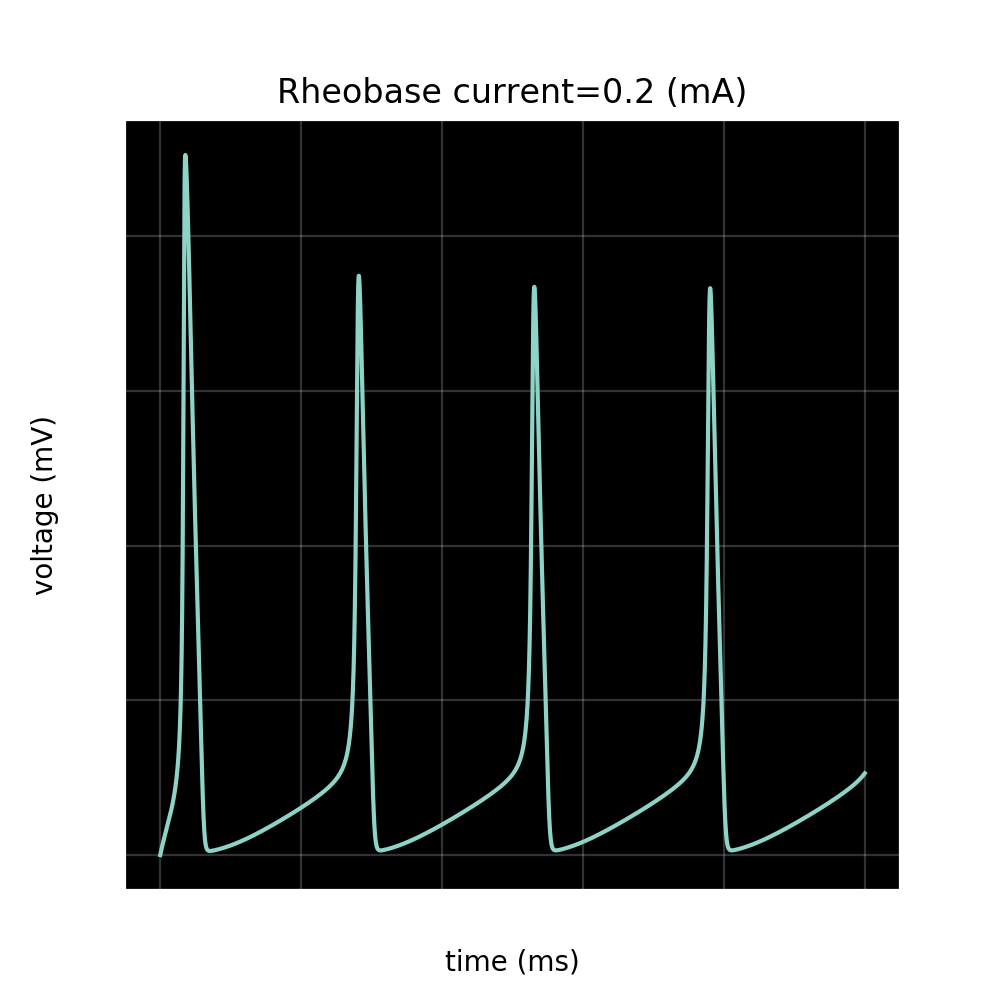

In [15]:
gK = 36 # reset gK
gNa = 120 # reset gNa
ENa = 100 # decrease ENa
Id = 0.2 # trial and error to find minimal current for repetitive spiking
# time vector
tvec = np.linspace(0, T, 10000)

# state (Vm, n, m, h)
Y = np.array([0.0, n_inf(), m_inf(), h_inf()])

# solve ODE system
# vy = (Vm[t0:tmax], n[t0:tmax], m[t0:tmax], h[t0:tmax])
Vy = odeint(compute_derivatives, Y, tvec)

# plot neuron potential
plt.figure(figsize=(5,5))
plt.grid(True, alpha=0.2)
plt.plot(tvec, Vy[:, 0])
plt.xlabel('time (ms)', color='black')
plt.ylabel('voltage (mV)', color='black')
plt.title('Rheobase current=%s (mA)'%Id, color='black')
plt.show()

When the reversal current of sodium is lower, the rheobase current decreases, since ...